Comparison of performance of 5 different classifiers using 5 fold cross validation from only 1 and increasing to fisrst two until all 45 features.

### 1: Importing models, metrics, libraries. Then loading data and filtering it.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import sklearn.model_selection as models
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy import mean
import warnings
warnings.filterwarnings('ignore')

In [28]:
#Loading the data into the dataframe and checking it over the top.
data = pd.read_csv('BP-MDD.txt')
data

,0.056843,0.056034,0.056087,0.10826,0.067739,0.042298,0.10173,0.082679,0.066114,0.082551,...,0.062902,0.070859,0.099695,0.085014,0.10353,0.062956,0.068951,0.066857,0.078855,1
0,0.043384,0.067421,0.080000,0.082357,0.067969,0.046202,0.081793,0.093981,0.066849,0.084358,...,0.061850,0.068831,0.095510,0.064500,0.064815,0.058589,0.103060,0.059452,0.062202,1
1,0.041608,0.047949,0.079565,0.095533,0.075895,0.045371,0.058734,0.092157,0.078914,0.086527,...,0.066815,0.057044,0.100950,0.066990,0.077759,0.064037,0.123680,0.061762,0.065460,1
2,0.043108,0.040895,0.088175,0.061942,0.077486,0.054561,0.070293,0.099378,0.067504,0.096049,...,0.062421,0.061719,0.110120,0.065946,0.061221,0.057709,0.074477,0.066392,0.076199,1
3,0.032052,0.064807,0.095159,0.075693,0.091843,0.045781,0.052411,0.092720,0.074285,0.082294,...,0.066314,0.056200,0.093392,0.060312,0.072847,0.056664,0.075082,0.061823,0.060891,1
4,0.038326,0.051661,0.076422,0.069742,0.063791,0.037135,0.071507,0.092933,0.071394,0.077786,...,0.068092,0.063824,0.090633,0.076051,0.092445,0.055599,0.089684,0.058997,0.062982,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.039334,0.039038,0.063290,0.069748,0.078538,0.049620,0.071981,0.101090,0.080842,0.084489,...,0.066731,0.063783,0.094780,0.066084,0.079840,0.063200,0.097518,0.058948,0.062585,2
137,0.035053,0.082281,0.093746,0.053249,0.058982,0.067863,0.087905,0.111840,0.067916,0.106890,...,0.063147,0.067529,0.111490,0.081081,0.081021,0.066966,0.105460,0.061842,0.066194,2
138,0.096909,0.067993,0.058444,0.063203,0.055530,0.049171,0.077054,0.168220,0.063023,0.116360,...,0.078490,0.067481,0.114340,0.085695,0.106790,0.074392,0.240020,0.087765,0.095459,2
139,0.039809,0.065715,0.065073,0.059256,0.072133,0.054797,0.058030,0.093569,0.072504,0.088011,...,0.072091,0.068698,0.117440,0.082197,0.073691,0.061511,0.094285,0.060423,0.066782,2


#### As the data does not have any columns in it so will add columns as feature that we will use in the model.

In [3]:
#creating the column_name list and loading it with feature_1, feature_2, .. , feature_45 and appending BD/MDD
column_name=[]
for x in range(1,46):
    feature="feature_"+str(x)
    column_name=column_name + [feature]
column_name.append('BD/MDD')

In [4]:
#Checking if list is the required list we need or not using for loop
for x in range(0,46):
    print(column_name[x])

feature_1
feature_2
feature_3
feature_4
feature_5
feature_6
feature_7
feature_8
feature_9
feature_10
feature_11
feature_12
feature_13
feature_14
feature_15
feature_16
feature_17
feature_18
feature_19
feature_20
feature_21
feature_22
feature_23
feature_24
feature_25
feature_26
feature_27
feature_28
feature_29
feature_30
feature_31
feature_32
feature_33
feature_34
feature_35
feature_36
feature_37
feature_38
feature_39
feature_40
feature_41
feature_42
feature_43
feature_44
feature_45
BD/MDD


In [5]:
#Naming the columns in the dataframe using the list.
data.columns = column_name
data.head(10)
#Removing the BD/MDD value from the list so that we can use the list to iterate on features only later on.
column_name.remove('BD/MDD')

### 2:  Loading up the models and running a 5 fold cross validation on each model 100 times to get Precision, Accuracy, F1 score, Sensitivity, specificity and AUC values from the data.

In [11]:
#Taking list of models to load into score value dataframes
model_names = ['RandomForrestClassifier','NaiveBase', 'DecisionTreeClassifier', ' LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis']
#Creating empty dataframes for all the scoring value required.
PrecisionTable = pd.DataFrame(columns=model_names)
AccuracyTable = pd.DataFrame(columns=model_names)
SensitivityTable = pd.DataFrame(columns=model_names)
SpecificityTable = pd.DataFrame(columns=model_names)
F1_ScoreTable = pd.DataFrame(columns=model_names)
AUCTable = pd.DataFrame(columns=model_names)

#Creating a dictionary to input in cross value validation to get all these scores returned.
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'f1_score':make_scorer(f1_score),
           'specificity':make_scorer(recall_score, pos_label=2),
           'sensitivity':make_scorer(recall_score, pos_label=1),
           'roc_auc':make_scorer(roc_auc_score)
          }


In [12]:
#Loading X values and y values for the models.

X = data[[]]
y = data[['BD/MDD']]

In [14]:
#Taking empty lists of all the scores with respect to the models that we will perform on the data.
#These list will store the value of the scores we get from cross validation.
precision_score_rf=[]
precision_score_dt=[]
precision_score_nb=[]
precision_score_lda=[]
precision_score_qda=[]

accuracy_score_rf=[]
accuracy_score_dt=[]
accuracy_score_nb=[]
accuracy_score_lda=[]
accuracy_score_qda=[]

f1_score_rf=[]
f1_score_dt=[]
f1_score_nb=[]
f1_score_lda=[]
f1_score_qda=[]

sensitivity_score_rf=[]
sensitivity_score_dt=[]
sensitivity_score_nb=[]
sensitivity_score_lda=[]
sensitivity_score_qda=[]

specificity_score_rf=[]
specificity_score_dt=[]
specificity_score_nb=[]
specificity_score_lda=[]
specificity_score_qda=[]

roc_auc_score_rf=[]
roc_auc_score_dt=[]
roc_auc_score_nb=[]
roc_auc_score_lda=[]
roc_auc_score_qda=[]

In [15]:
#Looping columns in the column_name list 
for col in column_name:
    X.loc[:,-1]=data[col]
    #Declareing empty dictionaries for storing score values
    ScoreDict_rf = {}
    ScoreDict_dt = {}
    ScoreDict_nb = {}
    ScoreDict_lda = {}
    ScoreDict_qda = {}
    #Loop for 100 iterations of cross validation
    for i in range(100):
        #Running cross validation for each model and storing score data in respective dictionary.
        ScoreDict_rf = cross_validate(RandomForestClassifier(), X, y.values.ravel(), scoring=scoring, cv=5)
        ScoreDict_dt = cross_validate(DecisionTreeClassifier(), X, y.values.ravel(), scoring=scoring, cv=5)
        ScoreDict_nb = cross_validate(GaussianNB(), X, y.values.ravel(), scoring=scoring, cv=5)
        ScoreDict_lda = cross_validate(LinearDiscriminantAnalysis(), X, y.values.ravel(), scoring=scoring, cv=5)
        ScoreDict_qda = cross_validate(QuadraticDiscriminantAnalysis(), X, y.values.ravel(), scoring=scoring, cv=5)
    #Calculating mean for each dictionary score values using keys and values.
    for k,v in ScoreDict_rf.items():
        ScoreDict_rf[k] = sum(v)/ float(len(v))
    for k,v in ScoreDict_dt.items():
        ScoreDict_dt[k] = sum(v)/ float(len(v))
    for k,v in ScoreDict_nb.items():
        ScoreDict_nb[k] = sum(v)/ float(len(v))
    for k,v in ScoreDict_lda.items():
        ScoreDict_lda[k] = sum(v)/ float(len(v))
    for k,v in ScoreDict_qda.items():
        ScoreDict_qda[k] = sum(v)/ float(len(v))
        
    #Appending values of dictionary into the respective lists to store all 45 feature data together.
    
    precision_score_rf.append(ScoreDict_rf['test_precision'])
    precision_score_dt.append(ScoreDict_dt['test_precision'])
    precision_score_nb.append(ScoreDict_nb['test_precision'])
    precision_score_lda.append(ScoreDict_lda['test_precision'])
    precision_score_qda.append(ScoreDict_qda['test_precision'])
    
    accuracy_score_rf.append(ScoreDict_rf['test_accuracy'])
    accuracy_score_dt.append(ScoreDict_dt['test_accuracy'])
    accuracy_score_nb.append(ScoreDict_nb['test_accuracy'])
    accuracy_score_lda.append(ScoreDict_lda['test_accuracy'])
    accuracy_score_qda.append(ScoreDict_qda['test_accuracy'])
    
    f1_score_rf.append(ScoreDict_rf['test_f1_score'])
    f1_score_dt.append(ScoreDict_dt['test_f1_score'])
    f1_score_nb.append(ScoreDict_nb['test_f1_score'])
    f1_score_lda.append(ScoreDict_lda['test_f1_score'])
    f1_score_qda.append(ScoreDict_qda['test_f1_score'])
    
    sensitivity_score_rf.append(ScoreDict_rf['test_sensitivity'])
    sensitivity_score_dt.append(ScoreDict_dt['test_sensitivity'])
    sensitivity_score_nb.append(ScoreDict_nb['test_sensitivity'])
    sensitivity_score_lda.append(ScoreDict_lda['test_sensitivity'])
    sensitivity_score_qda.append(ScoreDict_qda['test_sensitivity'])
    
    specificity_score_rf.append(ScoreDict_rf['test_specificity'])
    specificity_score_dt.append(ScoreDict_dt['test_specificity'])
    specificity_score_nb.append(ScoreDict_nb['test_specificity'])
    specificity_score_lda.append(ScoreDict_lda['test_specificity'])
    specificity_score_qda.append(ScoreDict_qda['test_specificity'])
    
    roc_auc_score_rf.append(ScoreDict_rf['test_roc_auc'])
    roc_auc_score_dt.append(ScoreDict_dt['test_roc_auc'])
    roc_auc_score_nb.append(ScoreDict_nb['test_roc_auc'])
    roc_auc_score_lda.append(ScoreDict_lda['test_roc_auc'])
    roc_auc_score_qda.append(ScoreDict_qda['test_roc_auc'])

#Inputing all the list data into the respective dataframes for each score values into their respective model columns.
PrecisionTable['RandomForrestClassifier'] = precision_score_rf
PrecisionTable['DecisionTreeClassifier'] = precision_score_dt
PrecisionTable['NaiveBase'] = precision_score_nb
PrecisionTable['LinearDiscriminantAnalysis'] = precision_score_lda
PrecisionTable['QuadraticDiscriminantAnalysis'] = precision_score_qda

AccuracyTable['RandomForrestClassifier'] = accuracy_score_rf
AccuracyTable['DecisionTreeClassifier'] = accuracy_score_dt
AccuracyTable['NaiveBase'] = accuracy_score_nb
AccuracyTable['LinearDiscriminantAnalysis'] = accuracy_score_lda
AccuracyTable['QuadraticDiscriminantAnalysis'] = accuracy_score_qda

F1_ScoreTable['RandomForrestClassifier'] = f1_score_rf
F1_ScoreTable['DecisionTreeClassifier'] = f1_score_dt
F1_ScoreTable['NaiveBase'] = f1_score_nb
F1_ScoreTable['LinearDiscriminantAnalysis'] = f1_score_lda
F1_ScoreTable['QuadraticDiscriminantAnalysis'] = f1_score_qda

SpecificityTable['RandomForrestClassifier'] = specificity_score_rf
SpecificityTable['DecisionTreeClassifier'] = specificity_score_dt
SpecificityTable['NaiveBase'] = specificity_score_nb
SpecificityTable['LinearDiscriminantAnalysis'] = specificity_score_lda
SpecificityTable['QuadraticDiscriminantAnalysis'] = specificity_score_qda

SensitivityTable['RandomForrestClassifier'] = sensitivity_score_rf
SensitivityTable['DecisionTreeClassifier'] = sensitivity_score_dt
SensitivityTable['NaiveBase'] = sensitivity_score_nb
SensitivityTable['LinearDiscriminantAnalysis'] = sensitivity_score_lda
SensitivityTable['QuadraticDiscriminantAnalysis'] = sensitivity_score_qda

AUCTable['RandomForrestClassifier'] = roc_auc_score_rf
AUCTable['DecisionTreeClassifier'] = roc_auc_score_dt
AUCTable['NaiveBase'] = roc_auc_score_nb
AUCTable['LinearDiscriminantAnalysis'] = roc_auc_score_lda
AUCTable['QuadraticDiscriminantAnalysis'] = roc_auc_score_qda

In [16]:
#
PrecisionTable = PrecisionTable.drop(PrecisionTable.columns[3], axis=1)
AccuracyTable = AccuracyTable.drop(AccuracyTable.columns[3], axis=1)
AUCTable = AUCTable.drop(AUCTable.columns[3], axis=1)
F1_ScoreTable = F1_ScoreTable.drop(F1_ScoreTable.columns[3], axis=1)
SpecificityTable = SpecificityTable.drop(SpecificityTable.columns[3], axis=1)
SensitivityTable = SensitivityTable.drop(SensitivityTable.columns[3], axis=1)

### 3: Plotting graphs for each of the score calculated after all iterations and analyzing which is the best model out of all.

#### Tables are as follows:

In [20]:
PrecisionTable

,RandomForrestClassifier,NaiveBase,DecisionTreeClassifier,QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
0,0.633690,0.717179,0.637367,0.717179,0.721929
1,0.597954,0.675687,0.597954,0.675687,0.648818
2,0.572937,0.703175,0.572937,0.703175,0.717749
3,0.563235,0.816667,0.563235,0.816667,0.716883
4,0.591158,0.647273,0.591158,0.647273,0.663639
5,0.464423,0.612692,0.464423,0.612692,0.646364
6,0.536364,0.685000,0.536364,0.685000,0.673528
7,0.625592,0.699037,0.625592,0.699037,0.667948
8,0.505350,0.606795,0.505350,0.606795,0.688253
9,0.615849,0.705143,0.615849,0.705143,0.701557


In [19]:
AccuracyTable

,RandomForrestClassifier,NaiveBase,DecisionTreeClassifier,QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
0,0.638670,0.638670,0.645813,0.638670,0.681773
1,0.580788,0.616749,0.580788,0.616749,0.602709
2,0.574384,0.623153,0.574384,0.623153,0.687192
3,0.531034,0.673645,0.531034,0.673645,0.672660
4,0.596552,0.681281,0.596552,0.681281,0.688424
5,0.467980,0.545813,0.467980,0.545813,0.581281
6,0.531773,0.581034,0.531773,0.581034,0.623892
7,0.609852,0.695567,0.609852,0.695567,0.688916
8,0.495567,0.580542,0.495567,0.580542,0.659113
9,0.609360,0.695320,0.609360,0.695320,0.667241


In [30]:
F1_ScoreTable

,RandomForrestClassifier,NaiveBase,DecisionTreeClassifier,QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
0,0.636739,0.528148,0.644911,0.528148,0.605003
1,0.553697,0.549613,0.553697,0.549613,0.549066
2,0.585714,0.517785,0.585714,0.517785,0.657074
3,0.518952,0.596289,0.518952,0.596289,0.655950
4,0.577327,0.685243,0.577327,0.685243,0.680768
5,0.480971,0.350607,0.480971,0.350607,0.507968
6,0.508000,0.440574,0.508000,0.440574,0.577969
7,0.583539,0.675101,0.583539,0.675101,0.677165
8,0.499944,0.474109,0.499944,0.474109,0.633457
9,0.611318,0.682789,0.611318,0.682789,0.626459


In [21]:
SensitivityTable

,RandomForrestClassifier,NaiveBase,DecisionTreeClassifier,QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
0,0.642857,0.442857,0.657143,0.442857,0.542857
1,0.528571,0.471429,0.528571,0.471429,0.485714
2,0.614286,0.414286,0.614286,0.414286,0.614286
3,0.514286,0.485714,0.514286,0.485714,0.614286
4,0.614286,0.771429,0.614286,0.771429,0.757143
5,0.500000,0.271429,0.500000,0.271429,0.442857
6,0.485714,0.328571,0.485714,0.328571,0.514286
7,0.571429,0.685714,0.571429,0.685714,0.714286
8,0.500000,0.414286,0.500000,0.414286,0.614286
9,0.614286,0.685714,0.614286,0.685714,0.600000


In [31]:
SpecificityTable

,RandomForrestClassifier,NaiveBase,DecisionTreeClassifier,QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
0,0.634286,0.829524,0.634286,0.829524,0.816190
1,0.630476,0.760000,0.630476,0.760000,0.718095
2,0.536190,0.829524,0.536190,0.829524,0.760000
3,0.544762,0.857143,0.544762,0.857143,0.728571
4,0.576190,0.588571,0.576190,0.588571,0.616190
5,0.436190,0.817143,0.436190,0.817143,0.718095
6,0.576190,0.830476,0.576190,0.830476,0.732381
7,0.644762,0.701905,0.644762,0.701905,0.660952
8,0.489524,0.743810,0.489524,0.743810,0.701905
9,0.602857,0.703810,0.602857,0.703810,0.731429


In [18]:
AUCTable

,RandomForrestClassifier,NaiveBase,DecisionTreeClassifier,QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
0,0.638571,0.636190,0.645714,0.636190,0.679524
1,0.579524,0.615714,0.579524,0.615714,0.601905
2,0.575238,0.621905,0.575238,0.621905,0.687143
3,0.529524,0.671429,0.529524,0.671429,0.671429
4,0.595238,0.680000,0.595238,0.680000,0.686667
5,0.468095,0.544286,0.468095,0.544286,0.580476
6,0.530952,0.579524,0.530952,0.579524,0.623333
7,0.608095,0.693810,0.608095,0.693810,0.687619
8,0.494762,0.579048,0.494762,0.579048,0.658095
9,0.608571,0.694762,0.608571,0.694762,0.665714


<AxesSubplot:>

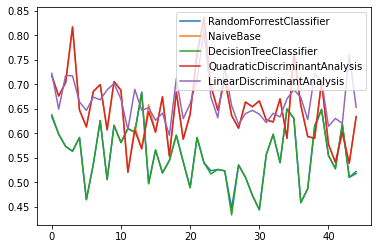

In [33]:
#Plotting graphs for the score values. 
import matplotlib.pyplot as plt
#Plotting X consist of the number of features, Y consist of the data and the lines are the values of each model.
PrecisionTable.plot()

<AxesSubplot:>

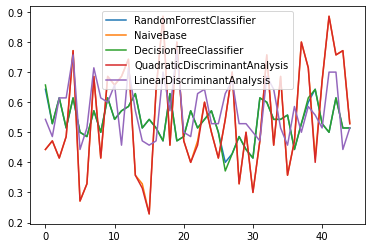

In [34]:
SensitivityTable.plot()

<AxesSubplot:>

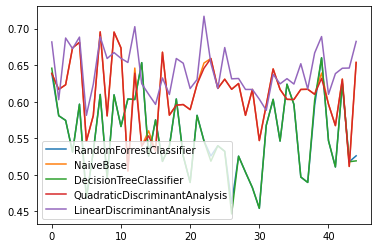

In [35]:
AccuracyTable.plot()

<AxesSubplot:>

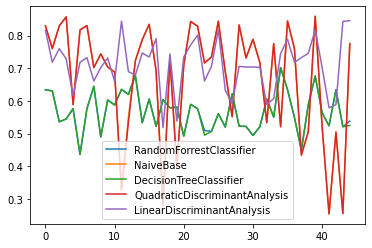

In [36]:
SpecificityTable.plot()

<AxesSubplot:>

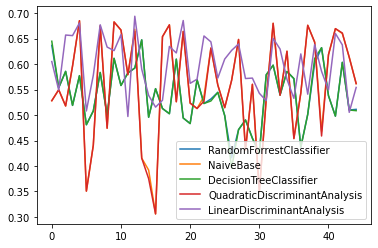

In [37]:
F1_ScoreTable.plot()

<AxesSubplot:>

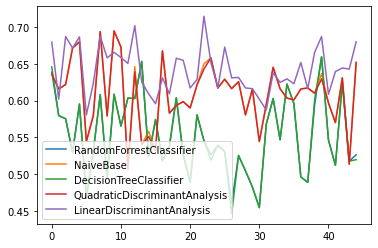

In [38]:
AUCTable.plot()

In [39]:
#Creating dataframe to store values of best accuracy of the models.
BestModel = pd.DataFrame(columns=model_names)

In [46]:
#Loading list to calculate average out of the AccuracyTable for each model
score = []
for col in AccuracyTable:
    score.append(np.mean(AccuracyTable[col]))

In [47]:
score

[0.5531855500821018,
 0.6110071154898744,
 0.5528735632183909,
 0.6103721948549535,
 0.6426217843459222]

In [52]:
#Taking new row dictionary to add up in the dataframe later on. 
new_row = {'RandomForrestClassifier':score[0], 'NaiveBase':score[1], 'DecisionTreeClassifier':score[2], 'LinearDiscriminantAnalysis':score[3], 'QuadraticDiscriminantAnalysis': score[4]}

In [53]:
new_row

{'RandomForrestClassifier': 0.5531855500821018,
 'NaiveBase': 0.6110071154898744,
 'DecisionTreeClassifier': 0.5528735632183909,
 'LinearDiscriminantAnalysis': 0.6103721948549535,
 'QuadraticDiscriminantAnalysis': 0.6426217843459222}

In [54]:
#Appending all value of dictionary into the dataframe.
BestModel = BestModel.append(new_row, ignore_index=True)

In [58]:
#Checking all values of the models. And declaring which one is best from all of them.
BestModel

,RandomForrestClassifier,NaiveBase,DecisionTreeClassifier,QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
0,0.553186,0.611007,0.552874,0.642622,0.610372
